In [65]:
from detecto.core import Model
from detecto import utils, visualize
from PIL import Image, ImageDraw
from shapely.geometry import Polygon

In [14]:
P = '/home/sharif/Downloads/public_place.jpg'

In [4]:
model = Model()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/sharif/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [5]:
image = utils.read_image(P)

In [96]:
labels, boxes, scores = model.predict(image)

/home/sharif/.local/lib/python3.6/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


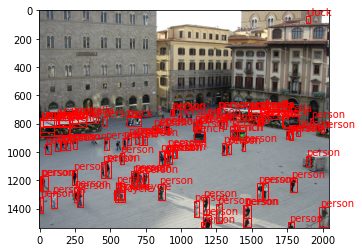

In [97]:
visualize.show_labeled_image(image, boxes, labels)

In [98]:
boxes[0]

tensor([1768.9785, 1182.9141, 1815.5663, 1285.7341])

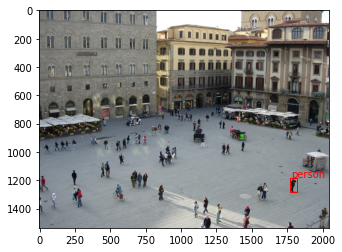

In [99]:
visualize.show_labeled_image(image, boxes[0], labels[0])

In [100]:
x1 = boxes[0][0]
y1 = boxes[0][1]
x2 = boxes[0][2]
y2 = boxes[0][3]

In [101]:
bbox = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2
}

In [102]:
def iou(bb1, bb2):
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0
    
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [103]:
iou(bbox, bbox)

tensor(1.)

Calculating iou for every box is O(n^2). This sucks. Is there a better way?